In [1]:
import numpy as np
import random
import math
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def load_data(miu0, sigma0, miu1, sigma1, alpha0, alpha1, size=1000):
    """初始化数据集，假设数据集遵从两个高斯分布
    Args:
        mu0: 高斯分布0的均值
        sigma0: 高斯分布0的方差
        mu1: 高斯分布1的均值
        sigma1: 高斯分布1的方差
        alpha0: 高斯分布0的权重
        alpha1: 高斯分布1的权重, alpha0+alpha1 = 1
        size: 生出混合高斯分布的数据量
    Returns:
        混合高斯分布的数据
    """
    data0 = np.random.normal(miu0, sigma0, int(size * alpha0))
    data1 = np.random.normal(miu1, sigma1, int(size * alpha1))
    res = []
    res.extend(data0)
    res.extend(data1)
    random.shuffle(res)
    
    return np.array(res)

def cal_gaussian(data, miu, sigma):
    """计算高斯函数值
    Args:
        data: numpy array
        mu: 高斯均值
        sigma: 高斯方差
    Returns:
        res: numpy array 
    """
    res = (1 / (np.sqrt(2 * np.pi) * sigma)) * \
          np.exp(-1 * (data - miu)**2/(2 * sigma**2))

    return res
        
def E_step(data, miu0, sigma0, miu1, sigma1, alpha0, alpha1):
    """EM算法中的E步
    Args:
        data: 观测到的数据y
        mu0: 高斯分布0的均值
        sigma0: 高斯分布0的方差
        mu1: 高斯分布1的均值
        sigma1: 高斯分布1的方差
        alpha0: 高斯分布0的权重 
        alpha1: 高斯分布1的权重
    Returns:
        gammas0: 每个数据点对高斯分布0的响应度, numpy array
        gammas1: 每个数据点对高斯分布0的响应度, numpy array
    """
    gammas0 = alpha0 * cal_gaussian(data, miu0, sigma0)
    gammas1 = alpha1 * cal_gaussian(data, miu1, sigma1)
    total = gammas0 + gammas1
    gammas0 = gammas0 / total
    gammas1 = gammas1 / total
    
    return gammas0, gammas1

def M_step(miu0, gammas0, miu1, gammas1, data):
    """EM算法中的M步
    Args:
        miu0: 高斯分布0的均值
        gammas0: 数据对高斯分布0的响应
        miu1: 高斯分布1的均值
        gammas1: 数据对高斯分布1的响应
        data: 数据
    Return:
        new_miu0: 高斯分布0新的均值
        new_sigma0: 高斯分布0新的方差
        new_miu1: 高斯分布1新的均值
        new_sigma1: 高斯分布1新的方差
        new_alpha0: 高斯分布0新的权重
        new_alpha1: 高斯分布1新的权重
    """
    new_miu0 = np.sum(gammas0 * data) / np.sum(gammas0)
    new_miu1 = np.sum(gammas1 * data) / np.sum(gammas1)
    
    new_sigma0 = np.sqrt(np.sum(gammas0 * (data - miu0)**2) / np.sum(gammas0))
    new_sigma1 = np.sqrt(np.sum(gammas1 * (data - miu1)**2) / np.sum(gammas1))
    new_alpha0 = np.sum(gammas0) / len(data)
    new_alpha1 = np.sum(gammas1) / len(data)
    
    return new_miu0, new_sigma0, new_miu1, new_sigma1, new_alpha0, new_alpha1

def EM_train(data, N=500):
    # init parameters
    alpha0 = 0.5; miu0 = 1; sigma0 = 1
    alpha1 = 0.5; miu1 = 0; sigma1 = 1
    
    cnt = 0
    while (cnt < N):
        cnt += 1
        gammas0, gammas1 = E_step(data, miu0, sigma0, miu1, sigma1, alpha0, alpha1)
        miu0, sigma0, miu1, sigma1, alpha0, alpha1 = M_step(miu0, gammas0, miu1, gammas1, data)
        
    return miu0, sigma0, miu1, sigma1, alpha0, alpha1
    

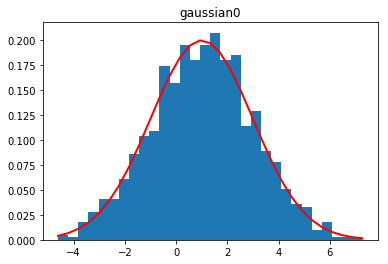

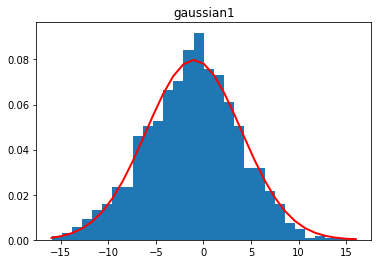

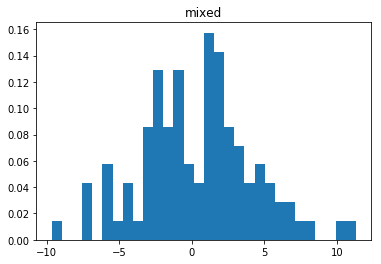

In [8]:
# init data
alpha0, alpha1 = 0.3, 0.7
miu0, sigma0 = 1, 2
miu1, sigma1 = -1, 5

gaussian0 = np.random.normal(miu0, sigma0, 1000)
count, bins, ignored = plt.hist(gaussian0, 30, density=True)
plt.plot(bins, 1/(sigma0 * np.sqrt(2 * np.pi)) * \
         np.exp( - (bins - miu0)**2 / (2 * sigma0**2) ), linewidth=2, color='r')
plt.title('gaussian0')
plt.show()

gaussian1 = np.random.normal(miu1, sigma1, 1000)
count, bins, ignored = plt.hist(gaussian1, 30, density=True)
plt.plot(bins, 1/(sigma1 * np.sqrt(2 * np.pi)) * \
         np.exp( - (bins - miu1)**2 / (2 * sigma1**2) ), linewidth=2, color='r')
plt.title('gaussian1')
plt.show()

data = load_data(miu0, sigma0, miu1, sigma1, alpha0, alpha1, size=100)
count, bins, ignored = plt.hist(data, 30, density=True)
plt.title('mixed')
plt.show()

In [21]:
p_miu0, p_sigma0, p_miu1, p_sigma1, p_alpha0, p_alpha1 = EM_train(data,2000)

In [22]:
print('real miu0 %.3f, predict miu0 %.3f'%(miu0, p_miu0))
print('real sigma0 %.3f, predict sigma0 %.3f' % (sigma0, p_sigma0))
print()
print('real miu1 %.3f, predict miu1 %.3f'%(miu1, p_miu1))
print('real sigma1 %.3f, predict sigma1 %.3f' % (sigma1, p_sigma1))
print()
print('real alpha0 %.3f, predict alpha0 %.3f' % (alpha0, p_alpha0))
print('real alpha1 %.3f, predict alpha1 %.3f' % (alpha1, p_alpha1))

real miu0 1.000, predict miu0 1.054
real sigma0 2.000, predict sigma0 4.396

real miu1 -1.000, predict miu1 -0.116
real sigma1 5.000, predict sigma1 3.249

real alpha0 0.300, predict alpha0 0.437
real alpha1 0.700, predict alpha1 0.563
